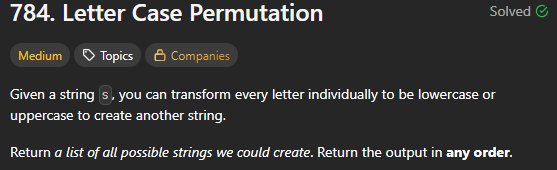

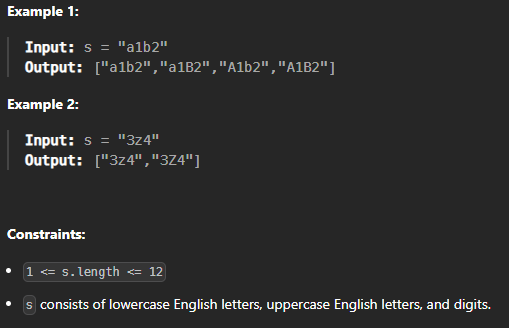

# Iterative Approach 

pretty brutte force and 2*N time Complexity

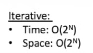

In [1]:
help(str)

Help on class str in module builtins:

class str(object)
 |  str(object='') -> str
 |  str(bytes_or_buffer[, encoding[, errors]]) -> str
 |
 |  Create a new string object from the given object. If encoding or
 |  errors is specified, then the object must expose a data buffer
 |  that will be decoded using the given encoding and error handler.
 |  Otherwise, returns the result of object.__str__() (if defined)
 |  or repr(object).
 |  encoding defaults to sys.getdefaultencoding().
 |  errors defaults to 'strict'.
 |
 |  Methods defined here:
 |
 |  __add__(self, value, /)
 |      Return self+value.
 |
 |  __contains__(self, key, /)
 |      Return bool(key in self).
 |
 |  __eq__(self, value, /)
 |      Return self==value.
 |
 |  __format__(self, format_spec, /)
 |      Return a formatted version of the string as described by format_spec.
 |
 |  __ge__(self, value, /)
 |      Return self>=value.
 |
 |  __getitem__(self, key, /)
 |      Return self[key].
 |
 |  __getnewargs__(...)
 |
 |  _

In [14]:
def letterCasePermutation(s):
    output = ['']
    for c in s:
        print(c)
        temp = []
        if c.isalpha():
            for o in output:
                temp.append(o+c.lower())
                temp.append(o+c.upper())
                print(temp)
        else:
            for o in output:
                temp.append(o+c)
                print(temp)
        output  = temp
    return output

In [15]:
letterCasePermutation('a1b6')

a
['a', 'A']
1
['a1']
['a1', 'A1']
b
['a1b', 'a1B']
['a1b', 'a1B', 'A1b', 'A1B']
6
['a1b6']
['a1b6', 'a1B6']
['a1b6', 'a1B6', 'A1b6']
['a1b6', 'a1B6', 'A1b6', 'A1B6']


['a1b6', 'a1B6', 'A1b6', 'A1B6']

In [16]:
def premutation(s):
    output = ['']
    for c in s:
        temp = []
        if c.isalpha():
            for o in output:
                temp.append(o+c.lower())
                temp.append(o+c.upper())
        else:
            for o in output:
                temp.append(o+c)

        output = temp
    return output
            

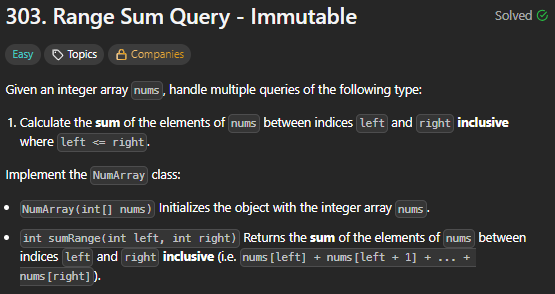

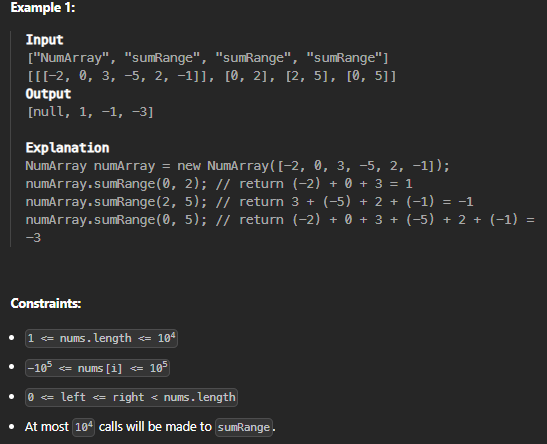

In [19]:
class NumArray:
    def __init__(self,nums):
        self.acc_nums = [0]
        for num in nums:
            self.acc_nums.append(self.acc_nums[-1]+num)
    def  sumRange(self,left ,right):
        return self.acc_nums[right+1] - self.acc_nums[left]

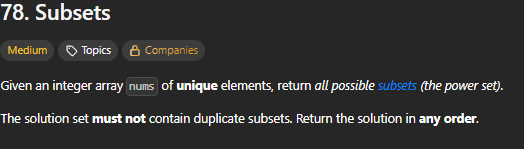

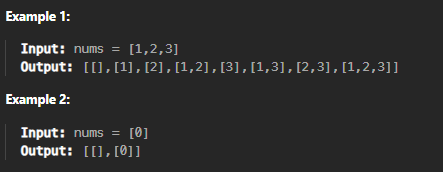

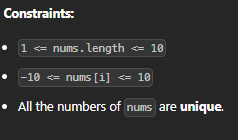

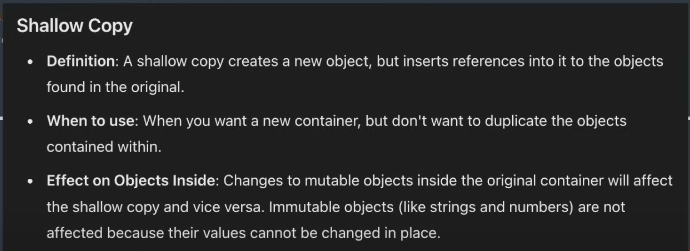

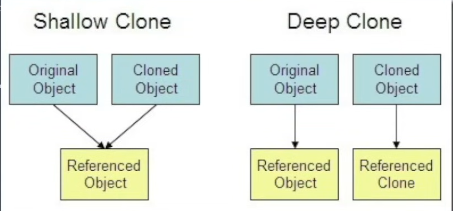

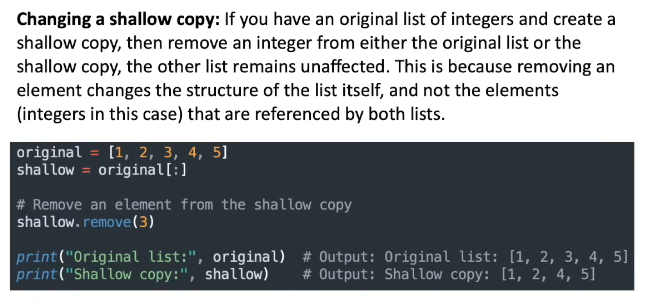

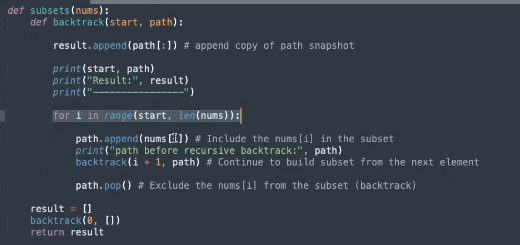

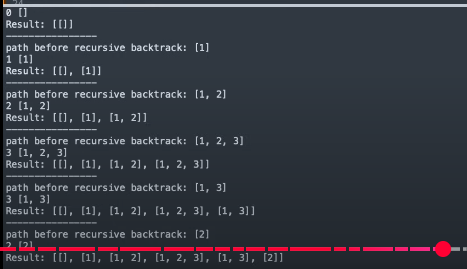

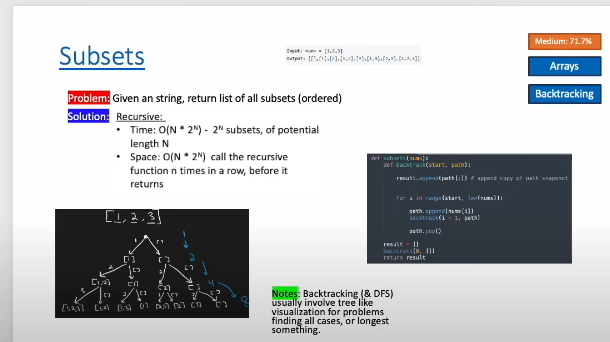

In [22]:
def subsets(nums):
    def backtrack(start, path):
        result.append(path[:])
        for i in range(start,len(nums)):
            path.append(nums[i])
            backtrack(i+1,path)

            path.pop()

    result = []
    backtrack(0,[])
    return result

In [23]:
nums = [1,2,3]
subsets(nums)

[[], [1], [1, 2], [1, 2, 3], [1, 3], [2], [2, 3], [3]]

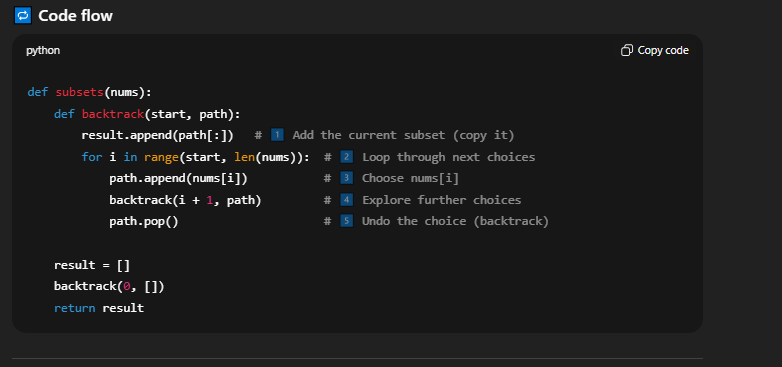

Not exactly 👀 — let’s break it down properly because that’s a really good intuition, but slightly off in detail.

This code **does not remove duplicates** — instead, it **systematically explores all possible combinations** using *backtracking* (and ensures no duplicates appear in the first place).

Let’s go step by step 🧠👇

---

### 💡 Idea

The goal is to find **all subsets** (aka power set) of a list, e.g.
`[1, 2, 3] → [[], [1], [2], [3], [1,2], [1,3], [2,3], [1,2,3]]`

We can think of it as:

> For each element, we have two choices — either **include it** or **skip it**.

---

### 🔁 Code flow

```python
def subsets(nums):
    def backtrack(start, path):
        result.append(path[:])   # 1️⃣ Add the current subset (copy it)
        for i in range(start, len(nums)):  # 2️⃣ Loop through next choices
            path.append(nums[i])           # 3️⃣ Choose nums[i]
            backtrack(i + 1, path)         # 4️⃣ Explore further choices
            path.pop()                     # 5️⃣ Undo the choice (backtrack)

    result = []
    backtrack(0, [])
    return result
```

---

### 🧩 Example walk-through

Let’s take `nums = [1, 2, 3]`

**Step 1:**
Start with `path = []`, `start = 0`
→ Add `[]` to result

**Loop i=0:** choose `1`
→ `path = [1]`, call `backtrack(1, [1])`

**Inside:**
Add `[1]` to result
Loop `i=1`: choose `2` → `[1, 2]`
Loop `i=2`: choose `3` → `[1, 2, 3]`
Backtrack one step at a time (remove last chosen)

After backtracking, the algorithm explores:

* `[1, 3]` (choose 1, skip 2, choose 3)
* `[2]`, `[2, 3]`
* `[3]`

---

### 🔙 Why no duplicates?

Because:

* The recursion *only looks forward* (`for i in range(start, len(nums))`).
* It never revisits earlier elements.
* Each path represents a unique subset combination.

So there’s no need to “pop if it’s already there.”
The `path.pop()` is just undoing the *last choice* before exploring the next option — it doesn’t remove duplicates, it resets the state.

---

### ⚙️ TL;DR logic

| Step                     | Action                | Meaning                           |
| ------------------------ | --------------------- | --------------------------------- |
| `result.append(path[:])` | Save current subset   | Add current combination           |
| `path.append(nums[i])`   | Choose current number | Include this element              |
| `backtrack(i+1, path)`   | Go deeper             | Explore next elements             |
| `path.pop()`             | Undo choice           | Backtrack to try next possibility |

---

Would you like me to show this process visually with a **recursion tree diagram** for `[1,2,3]`? That makes it super clear 🔥
